In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

In [10]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
print(df.describe())

         Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
print(df.isnull().sum())

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [16]:
sorted_trip_distance = df[['trip_distance']].sort_values(by='trip_distance', ascending=False)
print(sorted_trip_distance.head(10))

       trip_distance
9280           33.96
13861          33.92
6064           32.72
10291          31.95
29             30.83
18130          30.50
5792           30.33
15350          28.23
10302          28.20
2592           27.97


In [19]:
print(sorted_trip_distance.tail(10))

       trip_distance
20042            0.0
4910             0.0
3865             0.0
5630             0.0
11700            0.0
4171             0.0
20638            0.0
14372            0.0
1350             0.0
22670            0.0


In [21]:
sorted_total_amount = df[['total_amount']].sort_values(by='total_amount', ascending=False)
print(sorted_total_amount)

       total_amount
8476        1200.29
20312        450.30
13861        258.21
12511        233.74
15474        211.80
...             ...
11204         -5.30
14714         -5.30
20698         -5.80
17602         -5.80
12944       -120.30

[22699 rows x 1 columns]


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [27]:

X = df.drop(['Unnamed: 0', 'total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'], axis=1)
y = df['total_amount']



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [35]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [36]:
print(f"\nError Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Error Metrics:
Mean Absolute Error (MAE): 0.013949490923875861
Mean Squared Error (MSE): 0.027297496227734582
Root Mean Squared Error (RMSE): 0.16521953948529994


In [37]:
r2 = r2_score(y_test, y_pred)

print(f"\nR² Score: {r2}")

accuracy_percentage = r2 * 100

print(f"Accuracy Percentage: {accuracy_percentage}%")


R² Score: 0.9999435882430187
Accuracy Percentage: 99.99435882430187%


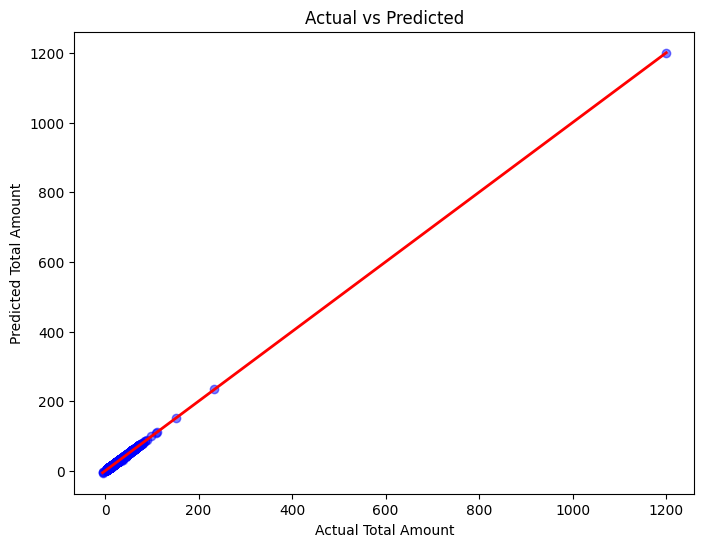

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Ideal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.show()